In [8]:
#Importación de librerías
from mplsoccer import Radar, FontManager, grid
import matplotlib.pyplot as plt

In [9]:
#jugadores que vamos a comparar

player1_name = "Bernardo Silva"
player1_team = "Manchester City"
player1_color = "#29B6F6"

player2_name = "Leroy Sané"
player2_team = "Bayern Munich"
player2_color = "#C62828"

In [10]:
#parametros que vamos a medir. 
#Se indica nombre del parámetro (param), valor más bajo (param_low), valor más alto (param_high) 
#valor de jugador1 (param_player1) y valor de jugador2 (param_player2)

param1= "Goles"
param1_low= 0
param1_high= 4
param1_player1= 1
param1_player2= 0

param2= "Asistencias"
param2_low= 0
param2_high= 4
param2_player1= 1
param2_player2= 0

param3= "Remates a Puerta"
param3_low= 0
param3_high= 4
param3_player1= 1
param3_player2= 4

param4= "Pases completados"
param4_low= 8
param4_high= 32
param4_player1= 28
param4_player2= 28

param5= "Toques"
param5_low= 16
param5_high= 64
param5_player1= 56
param5_player2= 53

param6= "Regates"
param6_low= 0
param6_high= 4
param6_player1= 3
param6_player2= 3

In [11]:
#Se cargan variables para su uso en una Lista
params = [param1, param2, param3, param4, param5 , param6]

# Agrupamos los límites inferior(low) y superior(high)
low =  [param1_low, param2_low, param3_low, param4_low, param5_low, param6_low, ]
high = [param1_high, param2_high, param3_high, param4_high, param5_high, param6_high]

#Almacenamos los valores de ambos jugadores
player1_values =   [param1_player1, param2_player1, param3_player1, param4_player1, param5_player1, param6_player1]
player2_values =  [param1_player2, param2_player2, param3_player2, param4_player2, param5_player2, param6_player2]

In [12]:
#Se cargan fuentes (tipografías) externas en variables

URL1 = ('https://raw.githubusercontent.com/googlefonts/SourceSerifProGFVersion/main/fonts/'
        'SourceSerifPro-Regular.ttf')
serif_regular = FontManager(URL1)
URL2 = ('https://raw.githubusercontent.com/googlefonts/SourceSerifProGFVersion/main/fonts/'
        'SourceSerifPro-ExtraLight.ttf')
serif_extra_light = FontManager(URL2)
URL3 = ('https://raw.githubusercontent.com/google/fonts/main/ofl/rubikmonoone/'
        'RubikMonoOne-Regular.ttf')
rubik_regular = FontManager(URL3)
URL4 = 'https://raw.githubusercontent.com/googlefonts/roboto/main/src/hinted/Roboto-Thin.ttf'
robotto_thin = FontManager(URL4)
URL5 = ('https://raw.githubusercontent.com/google/fonts/main/apache/robotoslab/'
        'RobotoSlab%5Bwght%5D.ttf')
robotto_bold = FontManager(URL5)

In [13]:
#Configuración de la forma del radar
radar = Radar(params, low, high,
              # whether to round any of the labels to integers instead of decimal places
              round_int=[False]*len(params),
              num_rings=4,  # the number of concentric circles (excluding center circle)
              # if the ring_width is more than the center_circle_radius then
              # the center circle radius will be wider than the width of the concentric circles
              ring_width=1, center_circle_radius=1)

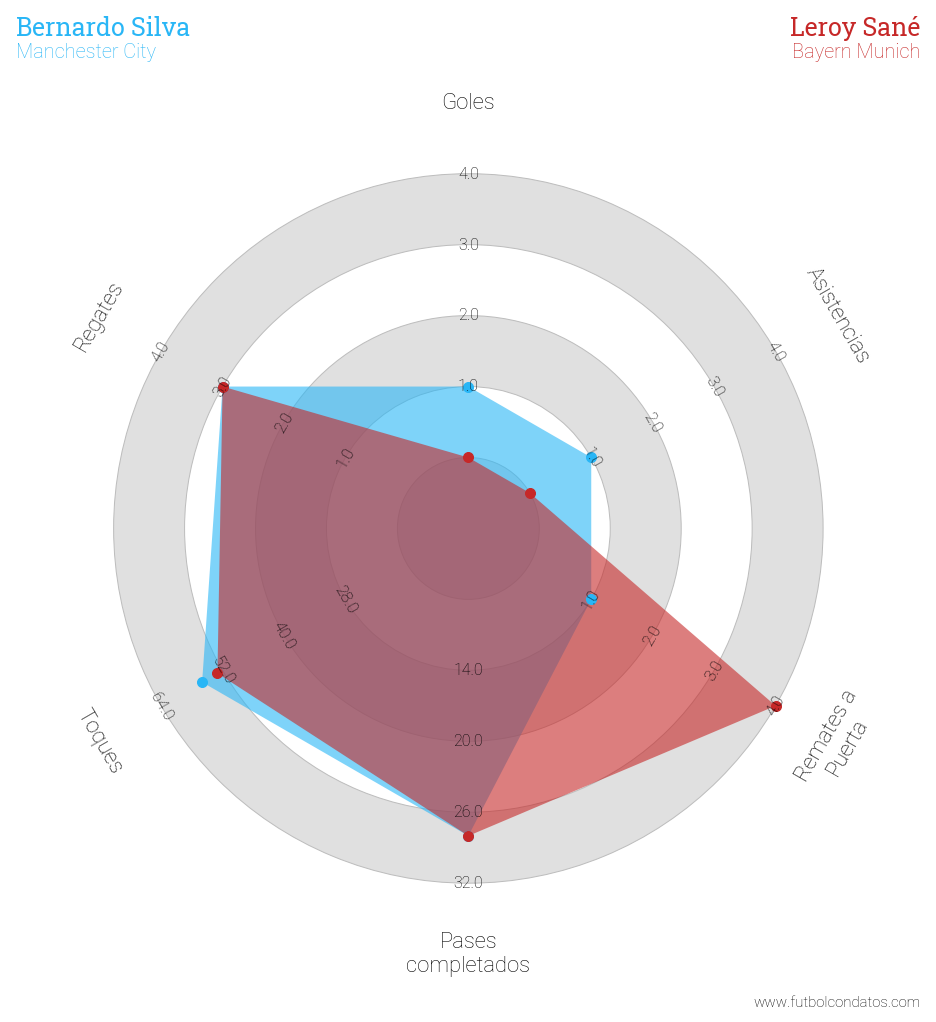

In [14]:
#Dibujamos el radar
# creating the figure using the grid function from mplsoccer:
fig, axs = grid(figheight=14, grid_height=0.915, title_height=0.06, endnote_height=0.025,
                title_space=0, endnote_space=0, grid_key='radar', axis=False)

# plot radar
radar.setup_axis(ax=axs['radar'])  # format axis as a radar
rings_inner = radar.draw_circles(ax=axs['radar'], facecolor='#E0E0E0', edgecolor='#BDBDBD')
radar_output = radar.draw_radar_compare(player1_values, player2_values, ax=axs['radar'],
                                        kwargs_radar={'facecolor': player1_color, 'alpha': 0.6},
                                        kwargs_compare={'facecolor': player2_color, 'alpha': 0.6})
radar_poly, radar_poly2, vertices1, vertices2 = radar_output
range_labels = radar.draw_range_labels(ax=axs['radar'], fontsize=16,
                                       fontproperties=robotto_thin.prop)
param_labels = radar.draw_param_labels(ax=axs['radar'], fontsize=22,
                                       fontproperties=robotto_thin.prop)
axs['radar'].scatter(vertices1[:, 0], vertices1[:, 1],
                     c=player1_color, edgecolors=player1_color, marker='o', s=100, zorder=2)
axs['radar'].scatter(vertices2[:, 0], vertices2[:, 1],
                     c=player2_color, edgecolors=player2_color, marker='o', s=100, zorder=2)
# adding the endnote and title text (these axes range from 0-1, i.e. 0, 0 is the bottom left)
# Note we are slightly offsetting the text from the edges by 0.01 (1%, e.g. 0.99)
endnote_text = axs['endnote'].text(0.99, 0.5, 'www.futbolcondatos.com', fontsize=15,
                                   fontproperties=robotto_thin.prop, ha='right', va='center')
title1_text = axs['title'].text(0.01, 0.65, player1_name, fontsize=25, color=player1_color,
                                fontproperties=robotto_bold.prop, ha='left', va='center')
title2_text = axs['title'].text(0.01, 0.25, player1_team, fontsize=20,
                                fontproperties=robotto_thin.prop,
                                ha='left', va='center', color=player1_color)
title3_text = axs['title'].text(0.99, 0.65, player2_name, fontsize=25,
                                fontproperties=robotto_bold.prop,
                                ha='right', va='center', color=player2_color)
title4_text = axs['title'].text(0.99, 0.25, player2_team, fontsize=20,
                                fontproperties=robotto_thin.prop,
                                ha='right', va='center', color=player2_color)
